### HeroesOfPymoli
* Pandas Challenge.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

## Player Count

* Display the total number of players


In [2]:
#get unique players
total_players = purchase_data["SN"].unique()

#set up a dictionary
playerDict = [{"Total Players":len(total_players)}]

#set up a pandas Data Frame
total_players_df = pd.DataFrame(playerDict)

# Display the frame
total_players_df

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
# perform all the necessary calculations and store results
unique_items  = len(purchase_data["Item ID"].unique())
average_price = purchase_data["Price"].mean()
num_purchases = len(purchase_data["Purchase ID"].unique())
total_revenue = purchase_data["Price"].sum()

# create a dictionary with column namess as key
# and calcuated results as values
summaryDict= [
    {'Number of Unique Items':unique_items,
     'Average Price':average_price,
     'Number of Purchases':num_purchases,
     'Total Revenue':total_revenue
    }
]

# create a new pandas DataFrame using the dictionar
summary_df = pd.DataFrame(summaryDict)

# format the currency columns
summary_df['Average Price'] = summary_df['Average Price'].map("\x24{:,.2f}".format)
summary_df['Total Revenue'] = summary_df['Total Revenue'].map("${:,.2f}".format)

# Display the dataframe
summary_df


,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
# count the unique number of male, female, other/non-disclosed
# If we simply total all male/female/other/non-disclosed then
# some players are counted more than once if they made multiple purchases
# drop unique duplicates and rename the 'SN' column to 'Total Count'
unique_df = purchase_data[['SN','Gender']].drop_duplicates()

#rename the SN column to Total Count
unique_df = unique_df.rename(columns={'SN': 'Total Count'})

# Group the data by Gender and sort it based on Total Count
gender_df = unique_df.groupby("Gender")
summ_df   = gender_df.count().sort_values("Total Count", ascending = False)


summ_df["Percentage of Players"] = (gender_df.count()/gender_df.count().sum()) * 100


# Format the results to give the dat cleaner formatting 
# print_summ_df = summ_df.style.format({
#     'Percentage of Players': '{:,.2f}%'.format,
# })

summ_df['Percentage of Players'] = summ_df['Percentage of Players'].map("{:.2f}%".format)


#  Display the summary data frame
summ_df


,Total Count,Percentage of Players
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
# Group the data by gender
gender_df = purchase_data.groupby("Gender")

#create a new dictionary with the necessary values
d = {'Purchase ID'                  : gender_df["Purchase ID"].count(), 
     'Average Purchase Price'       : gender_df["Price"].mean(),
     'Total Purchase Value'         : gender_df["Price"].sum(),
     'Avg Total Purchase per Person': gender_df["Price"].sum()/summ_df["Total Count"],
}
#create a new summaery data frame from the dictionary
df = pd.DataFrame(data=d)

# Give the displayed data cleaner formatting
# format the currency values to 2 decimal places and preceed with a dollar sign
df['Total Purchase Value']          = df['Total Purchase Value'].map("\x24{:,.2f}".format)
df['Avg Total Purchase per Person'] = df['Avg Total Purchase per Person'].map("${:,.2f}".format)

# display the summary data frame
df


,Purchase ID,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,3.203009,$361.94,$4.47
Male,652,3.017853,"$1,967.64",$4.07
Other / Non-Disclosed,15,3.346000,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [6]:
#unique purchase data for the relevant columns
upd_df = purchase_data[['SN','Gender', 'Age']].drop_duplicates()

# slice the data based on the bins using cut
upd_df['ages_bins'] = pd.cut(x=upd_df['Age'], 
                             bins=[0, 9, 14, 19, 24, 29, 34, 39, 1000000],
                             labels=['<10', '10-14', '15-19', '20-24', '25-29', '30-34','35-39', '40+'])

# group the data into age bins  
grouped_bins = upd_df.groupby(['ages_bins'])

# Create a dictionary for the new dataframe
ab_dict = {
    'Total Count'          : grouped_bins['Age'].count(), 
    'Percentage of Players': (grouped_bins['Age'].count()/len(upd_df)) * 100,
}

#create a new summary data frame from the dictionary
agebin_df = pd.DataFrame(data = ab_dict)

# Give the displayed data cleaner formatting
# format the currency values to 2 decimal places and follow with a percent sign
agebin_df['Percentage of Players'] = agebin_df['Percentage of Players'].map("{:.2f}%".format)

# display the summary data frame
agebin_df

,Total Count,Percentage of Players
ages_bins,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
#unique purchase data for the relevant columns
upd_df = purchase_data[['Purchase ID', 'SN', 'Age', 'Gender', 'Item ID', 'Item Name', 'Price']].drop_duplicates()

# slice the data based on the bins using cut
upd_df['ages_bins'] =pd.cut(x=purchase_data['Age'], 
                            bins=[0, 9, 14, 19, 24, 29, 34, 39, 1000000],
                            labels=['<10', '10-14', '15-19', '20-24', '25-29', '30-34','35-39', '40+'])


# group the data into age bins  
agrouped_bins = upd_df.groupby(['ages_bins'])

# Create a dictionary for the new dataframe
ab_dict = {
    'Purchase Count'               : agrouped_bins['Purchase ID'].count(), 
    'Average Purchase Price'       : agrouped_bins['Price'].mean(),
    'Total Purchase Value'         : agrouped_bins['Price'].sum(),
    'Avg Total Purchase per Person': agrouped_bins['Price'].sum()/grouped_bins['Age'].count()
}

#create a new purchase by age dataframe from the dictionary
pa_df = pd.DataFrame(data=ab_dict)

# Give the displayed data cleaner formatting
# format the currency values to 2 decimal places and preceed with a dollar sign
pa_df['Average Purchase Price']        = pa_df['Average Purchase Price'].map("${:,.2f}".format)
pa_df['Total Purchase Value']          = pa_df['Total Purchase Value'].map("${:,.2f}".format)
pa_df['Avg Total Purchase per Person'] = pa_df['Avg Total Purchase per Person'].map("${:,.2f}".format)

# display the purchase by age data frame
pa_df


,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
ages_bins,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [8]:
# Group the data by gender
ts_df = purchase_data.groupby("SN")

#create a new dictionary with the necessary values
ts_dict = {
    'Purchase Count'        : ts_df["Purchase ID"].count(), 
    'Average Purchase Price': ts_df["Price"].mean(),
    'Total Purchase Value'  : ts_df["Price"].sum(),
}

#create a new summary data frame from the dictionary
tsdf = pd.DataFrame(data=ts_dict)

#sort the dataframe by total purchase values and store only the first five rows
sorted_ts = tsdf.sort_values(['Total Purchase Value'], ascending = False).head(5)

# Give the displayed data cleaner formatting
# format the currency values to 2 decimal places and preceed with a dollar sign
sorted_ts['Average Purchase Price'] = sorted_ts['Average Purchase Price'].map("\x24{:,.2f}".format)
sorted_ts['Total Purchase Value']   = sorted_ts['Total Purchase Value'].map("\x24{:,.2f}".format)# display the purchase by age data frame

# display the sorted top spender data frame
sorted_ts

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
# Store the relevant data columnts from the purchase data 
# into a popular items dataframe
pi_df = purchase_data[['Item ID', 'Item Name', 'Price']]

# group the popular items by item id and item name
pi_df_grouped = pi_df.groupby(['Item ID', 'Item Name'])

#create a new dictionary with the necessary values
pi_dict = {
    'Purchase Count'      : pi_df_grouped["Item ID"].count(), 
    'Item Price'          : pi_df_grouped["Price"].mean(),
    'Total Purchase Value': pi_df_grouped["Price"].sum(),
}

#create a new poplular items dataframe from the dictionary
pi_df = pd.DataFrame(data = pi_dict)

#sort the dataframe by total purchase values and store only the first five rows
sorted_pi = pi_df.sort_values(['Purchase Count'], ascending = False).head(5)

# just another way to format 
# create the format dictionary
# apply it to df.style.format
pi_format_dict = {'Purchase Count': '{:,.0f}', 
                'Item Price': '${:,.2f}',
                'Total Purchase Value': '${:,.2f}'}

sorted_pi.style.format(pi_format_dict)

# Display the dataframe
sorted_pi

# Alternatively could use map to format the dataframe columns.
# sorted_pi['Item Price'] = sorted_pi['Item Price'].map("${:.2f}".format)
# sorted_pi['Total Purchase Value'] = sorted_pi['Total Purchase Value'].map("\x24{:,.2f}".format)



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [10]:
# using the profitable items dataframe from the previous section
# sort it on total purchase value
# again only saving the top five rows
sorted_mpi = pi_df.sort_values(['Total Purchase Value'], ascending = False).head(5)

# Format the data to make it cleaner and insert a dollar sign
sorted_mpi['Item Price']           = sorted_mpi['Item Price'].map("\x24{:,.2f}".format)
sorted_mpi['Total Purchase Value'] = sorted_mpi['Total Purchase Value'].map("\x24{:,.2f}".format)

# Display the dataframe
sorted_mpi

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


# Three observable trends based on the data.


## Trend 1

*Male Players* outnumber *Female players* by over five to one, but the average purchase per *Female Players* is slighly higher 

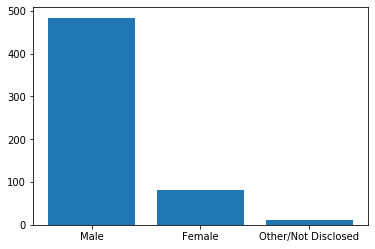

In [11]:
plt.bar(["Male", "Female", "Other/Not Disclosed"],summ_df['Total Count'])
plt.show()

In [12]:
#change string to float so I can put them in a bar chart
df['Avg Total Purchase per Person'] = df['Avg Total Purchase per Person'].replace({'\$': '', ',': ''}, regex=True).astype(float)

,Purchase ID,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,3.203009,$361.94,4.47
Male,652,3.017853,"$1,967.64",4.07
Other / Non-Disclosed,15,3.346000,$50.19,4.56


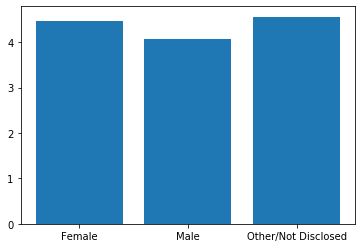

In [13]:
plt.bar(["Female", "Male", "Other/Not Disclosed"],df['Avg Total Purchase per Person'])
plt.show()

## Trend 2

For this data most of the players are in the age range 20 to 24 (44%), with 75% of players falling in the age range 15 to 29 

## Trend 3

The most profitable items are not necessarily the most expensive items, for example the most profitable game *Oathbreaker, Last Hope of the Breaking Storm* is priced at $4.23 which was cheaper than the following four most profitable games. 